In [41]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np

In [42]:
options = {
    'operating mode': 'resistance'
    }

In [43]:
t_eval = np.linspace(0, 3600, 100)
model = pybamm.lithium_ion.DFN(options=options)

geometry = model.default_geometry
param = model.default_parameter_values
param.update({"Resistance function [Ohm]": 5}, check_already_exists=False)
param.process_model(model)
param.process_geometry(geometry)
mesh = pybamm.Mesh(
    geometry, model.default_submesh_types, model.default_var_pts
)
disc = pybamm.Discretisation(mesh, model.default_spatial_methods)
disc.process_model(model)
solution = model.default_solver.solve(model, t_eval)


In [44]:
terminal_voltage = solution['Terminal voltage [V]'].entries
current_density = solution["Current collector current density [A.m-2]"].entries
time = solution["Time [h]"].entries
pos_ocp = solution["X-averaged positive electrode open circuit potential [V]"].entries
neg_ocp = solution["X-averaged negative electrode open circuit potential [V]"].entries

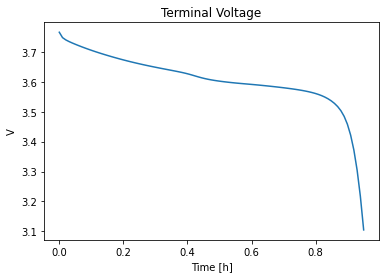

In [45]:
plt.plot(time, terminal_voltage)
plt.xlabel("Time [h]")
plt.ylabel("V")
plt.title("Terminal Voltage")
plt.show()

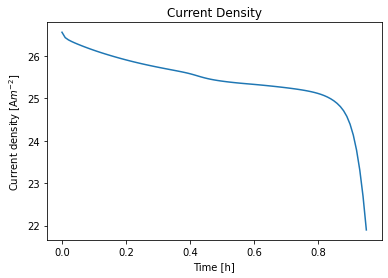

In [46]:
plt.plot(time, current_density)
plt.xlabel("Time [h]")
plt.ylabel(r'Current density [A$m^{-2}$]')
plt.title("Current Density")
plt.show()

In [47]:
param.export_csv("default-parameters.csv")